In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

# use CMU Serif
import matplotlib as mpl
import matplotlib.font_manager as font_manager
mpl.rcParams['font.family']='serif'
# cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
cmfont = font_manager.FontProperties('/Users/theoares/Library/Fonts/cmunrm.otf')
mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.transforms import Bbox

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import h5py
import os
import itertools
from utils import *

/Users/theoares/miniconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['/Users/theoares/Library/Fonts/cmunrm.otf'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


In [5]:
# ens = '24I/ml0p005/'
# # ens = '24I/ml0p01/'
# L = Lattice(24, 64)
# ainv = 1.784
# a = hbarc / ainv

# file_path = '/Users/theoares/Dropbox (MIT)/research/0nubb/analysis_output/' + ens + 'Z_gamma.h5'
# f = h5py.File(file_path, 'r')
# moms = f['momenta'][()]
# mu_list = np.array([get_energy_scale(q, a, L) for q in moms])
# Zq = np.real(f['Zq'][()])
# n_momenta, n_boot = Zq.shape
# ZV = np.real(f['ZV'][()])
# ZA = np.real(f['ZA'][()])
# Z = np.zeros((5, 5, n_momenta, n_boot), dtype = np.float64)
# for i, j in itertools.product(range(5), repeat = 2):
#     key = 'Z' + str(i + 1) + str(j + 1)
#     Z[i, j] = np.real(f[key][()])

In [15]:
ensembles = ['24I/ml0p005/', '24I/ml0p01/']
Lats = [Lattice(24, 64), Lattice(24, 64)]
ainv_list = [1.784, 1.784]
a_list = [hbarc / ainv for ainv in ainv_list]
n_ens = len(ensembles)

colors = ['r', 'b']

file_paths = ['/Users/theoares/Dropbox (MIT)/research/0nubb/analysis_output/' + ens + 'Z_gamma.h5' for ens in ensembles]
Fs = [h5py.File(fpath, 'r') for fpath in file_paths]
mom_list = [f['momenta'][()] for f in Fs]
mu_list = [np.array([get_energy_scale(q, a_list[i], Lats[i]) for q in mom_list[i]]) for i in range(n_ens)]
Zq_list = [np.real(f['Zq'][()]) for f in Fs]
n_momenta, n_boot = [Zq.shape[0] for Zq in Zq_list], [Zq.shape[1] for Zq in Zq_list]
ZV_list = [np.real(f['ZV'][()]) for f in Fs]
ZA_list = [np.real(f['ZA'][()]) for f in Fs]
Z_list = []
for idx in range(n_ens):
    Z = np.zeros((5, 5, n_momenta[idx], n_boot[idx]), dtype = np.float64)
    f = Fs[idx]
    for i, j in itertools.product(range(5), repeat = 2):
        key = 'Z' + str(i + 1) + str(j + 1)
        Z[i, j] = np.real(f[key][()])
    Z_list.append(Z)

<IPython.core.display.Javascript object>


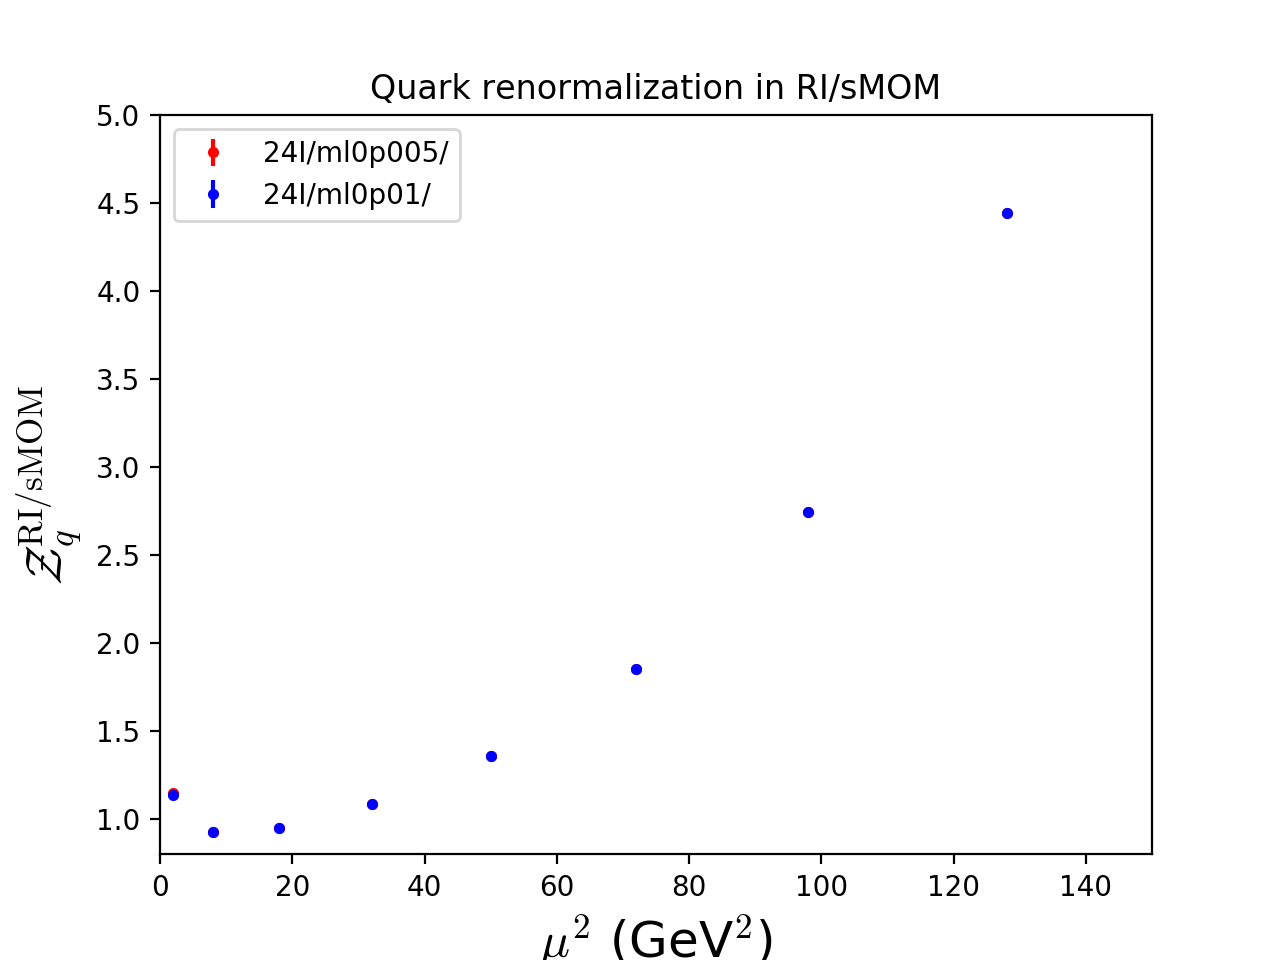

In [25]:
# Zq
Zq_mu_list = [np.mean(Zq, axis = 1) for Zq in Zq_list]
Zq_sigma_list = [np.std(Zq, axis = 1, ddof = 1) for Zq in Zq_list]
plt.figure()
for idx in range(n_ens):
    plt.errorbar([square(k) for k in mom_list[idx]], Zq_mu_list[idx], Zq_sigma_list[idx], fmt = '.', c = colors[idx], label = ensembles[idx])
plt.ylim((0.8, 5))
plt.xlim((0, 150))
plt.xlabel('$\mu^2$ (GeV$^2$)', fontsize = 18)
plt.ylabel('$\mathcal{Z}_q^\mathrm{RI/sMOM}$', fontsize = 18)
plt.title('Quark renormalization in RI/sMOM')
plt.legend()
plt.show()

In [24]:
Zq_mu_list

[array([1.1471206e+00, 9.2615068e-01, 9.4746321e-01, 1.0843989e+00,
        1.3604231e+00, 1.8558714e+00, 2.7446985e+00, 4.4451041e+00,
        8.1823196e+00, 1.8929085e+01, 7.7054588e+01, 1.2512252e+09],
       dtype=float32),
 array([1.1352017 , 0.9270283 , 0.94828093, 1.0845627 , 1.3602386 ,
        1.8554399 , 2.7440019 , 4.4440074 , 8.180355  ], dtype=float32)]

<IPython.core.display.Javascript object>


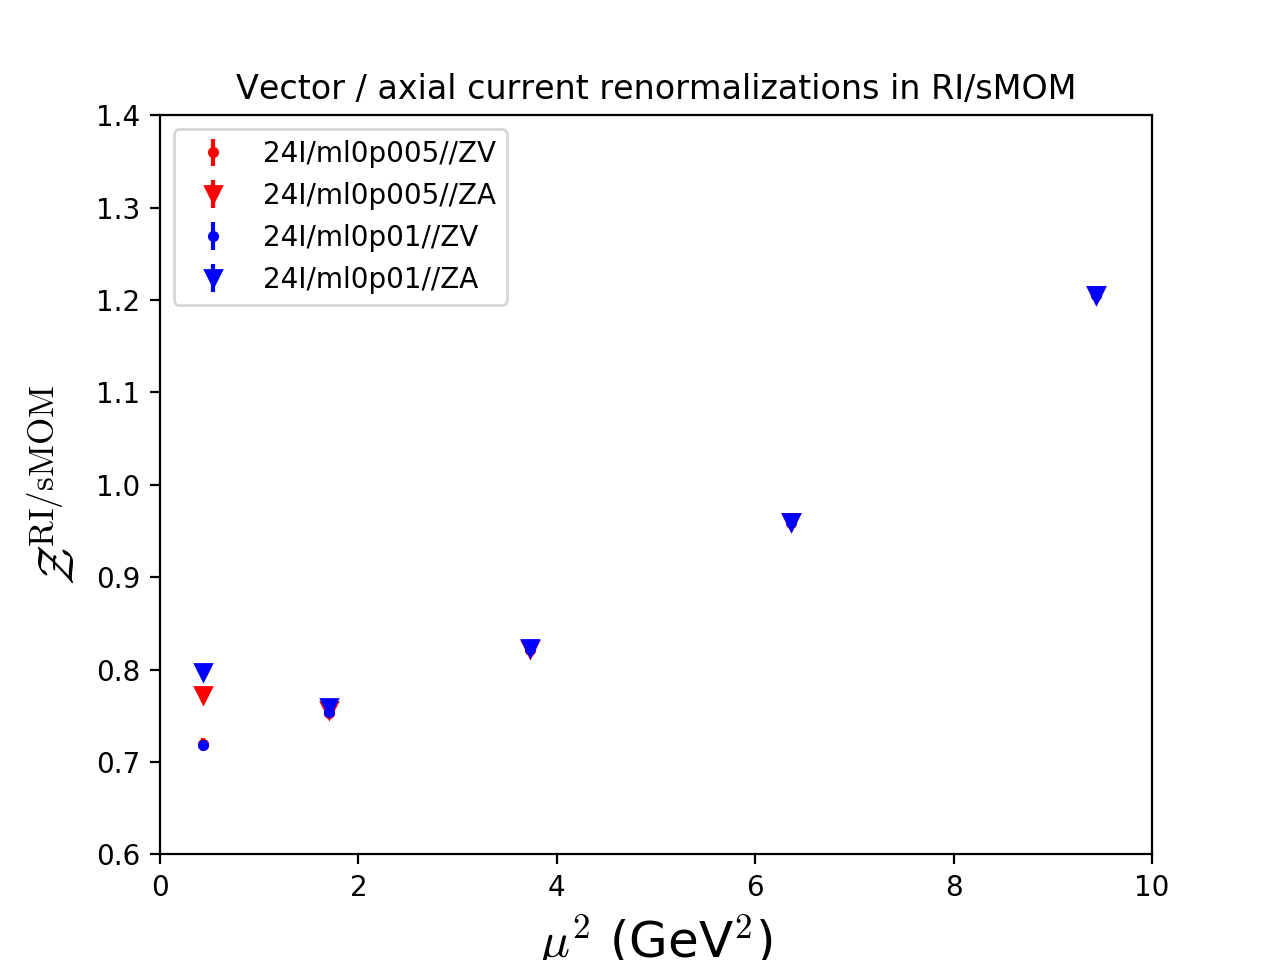

In [31]:
# ZV and ZA
ZV_mu_list = [np.mean(ZV, axis = 1) for ZV in ZV_list]
ZV_sigma_list = [np.std(ZV, axis = 1, ddof = 1) for ZV in ZV_list]
ZA_mu_list = [np.mean(ZA, axis = 1) for ZA in ZA_list]
ZA_sigma_list = [np.std(ZA, axis = 1, ddof = 1) for ZA in ZA_list]
plt.figure()
for idx in range(n_ens):
    plt.errorbar(mu_list[idx] ** 2, ZV_mu_list[idx], ZV_sigma_list[idx], fmt = '.', c = colors[idx], label = ensembles[idx] + '/ZV')
    plt.errorbar(mu_list[idx] ** 2, ZA_mu_list[idx], ZA_sigma_list[idx], fmt = 'v', c = colors[idx], label = ensembles[idx] + '/ZA')
plt.ylim((0.6, 1.4))
plt.xlim((0, 10))
plt.xlabel('$\mu^2$ (GeV$^2$)', fontsize = 18)
plt.ylabel('$\mathcal{Z}^\mathrm{RI/sMOM}$', fontsize = 18)
plt.title('Vector / axial current renormalizations in RI/sMOM')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


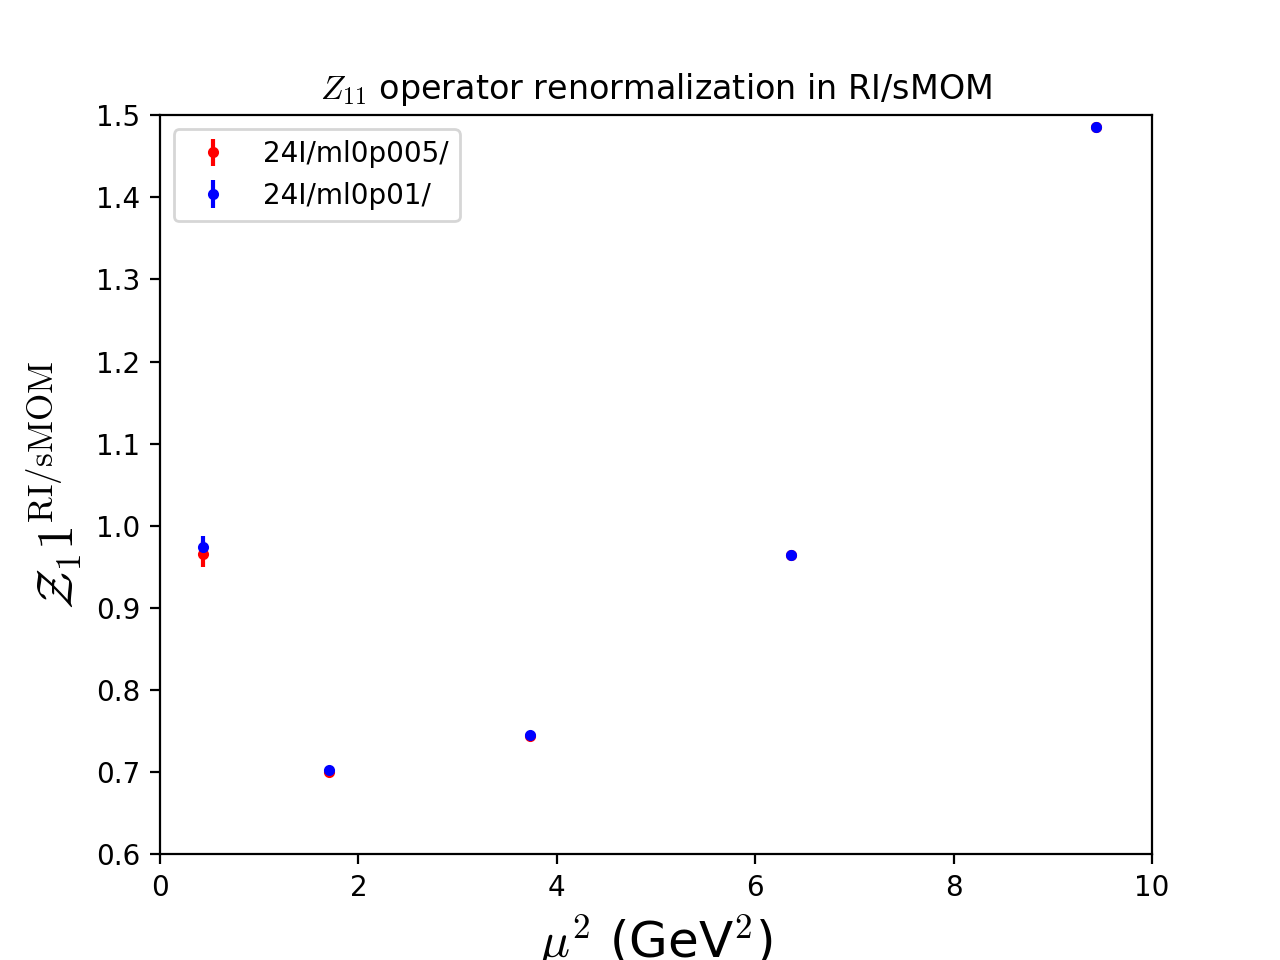

In [33]:
# Z11
Z11_mu_list = [np.mean(Z[0, 0], axis = 1) for Z in Z_list]
Z11_sigma_list = [np.std(Z[0, 0], axis = 1, ddof = 1) for Z in Z_list]
plt.figure()
for idx in range(n_ens):
    plt.errorbar(mu_list[idx] ** 2, Z11_mu_list[idx], Z11_sigma_list[idx], fmt = '.', c = colors[idx], label = ensembles[idx])
plt.ylim((0.6, 1.5))
plt.xlim((0, 10))
plt.xlabel('$\mu^2$ (GeV$^2$)', fontsize = 18)
plt.ylabel('$\mathcal{Z}_11^\mathrm{RI/sMOM}$', fontsize = 18)
plt.title('$Z_{11}$ operator renormalization in RI/sMOM')
plt.legend()
plt.show()

In [34]:
Z11_mu_list

[array([ 9.65922557e-01,  7.00111256e-01,  7.44542352e-01,  9.64967741e-01,
         1.48599361e+00,  2.68078636e+00,  5.58847155e+00,  1.33963849e+01,
         3.70363276e+01,  1.14562128e+02,  3.15606912e+02, -1.02144364e+11]),
 array([ 0.97474548,  0.70293348,  0.7456114 ,  0.96511365,  1.48543361,
         2.67891957,  5.58449877, 13.38627174, 37.00488914])]

<IPython.core.display.Javascript object>


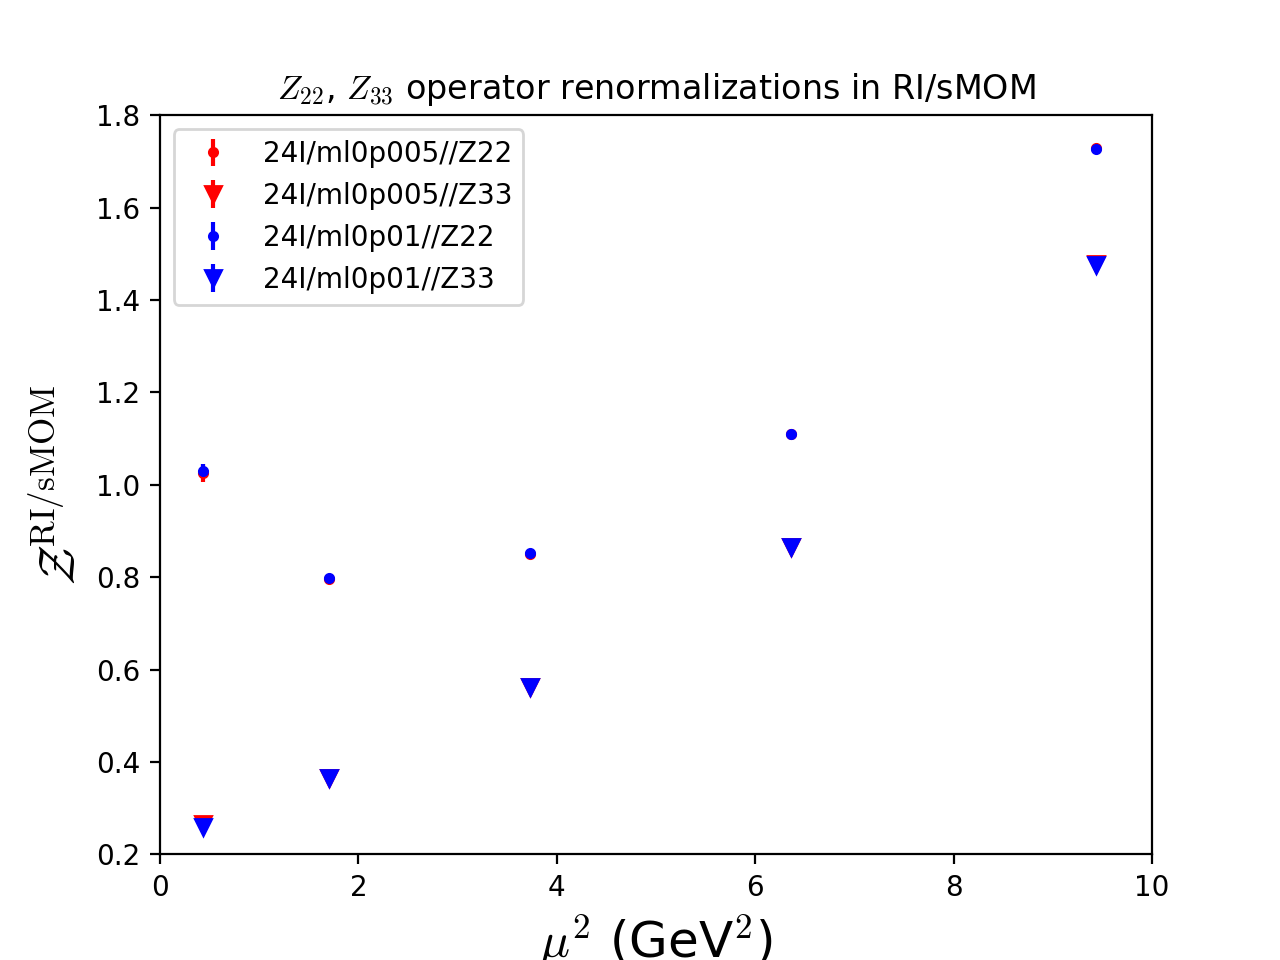

In [37]:
# Z22 and Z33 factors
Z22_mu_list = [np.mean(Z[1, 1], axis = 1) for Z in Z_list]
Z22_sigma_list = [np.std(Z[1, 1], axis = 1, ddof = 1) for Z in Z_list]
Z33_mu_list = [np.mean(Z[2, 2], axis = 1) for Z in Z_list]
Z33_sigma_list = [np.std(Z[2, 2], axis = 1, ddof = 1) for Z in Z_list]
plt.figure()
for idx in range(n_ens):
    plt.errorbar(mu_list[idx] ** 2, Z22_mu_list[idx], Z22_sigma_list[idx], fmt = '.', c = colors[idx], label = ensembles[idx] + '/Z22')
    plt.errorbar(mu_list[idx] ** 2, Z33_mu_list[idx], Z33_sigma_list[idx], fmt = 'v', c = colors[idx], label = ensembles[idx] + '/Z33')
plt.ylim((0.2, 1.8))
plt.xlim((0, 10))
plt.xlabel('$\mu^2$ (GeV$^2$)', fontsize = 18)
plt.ylabel('$\mathcal{Z}^\mathrm{RI/sMOM}$', fontsize = 18)
plt.title('$Z_{22}$, $Z_{33}$ operator renormalizations in RI/sMOM')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


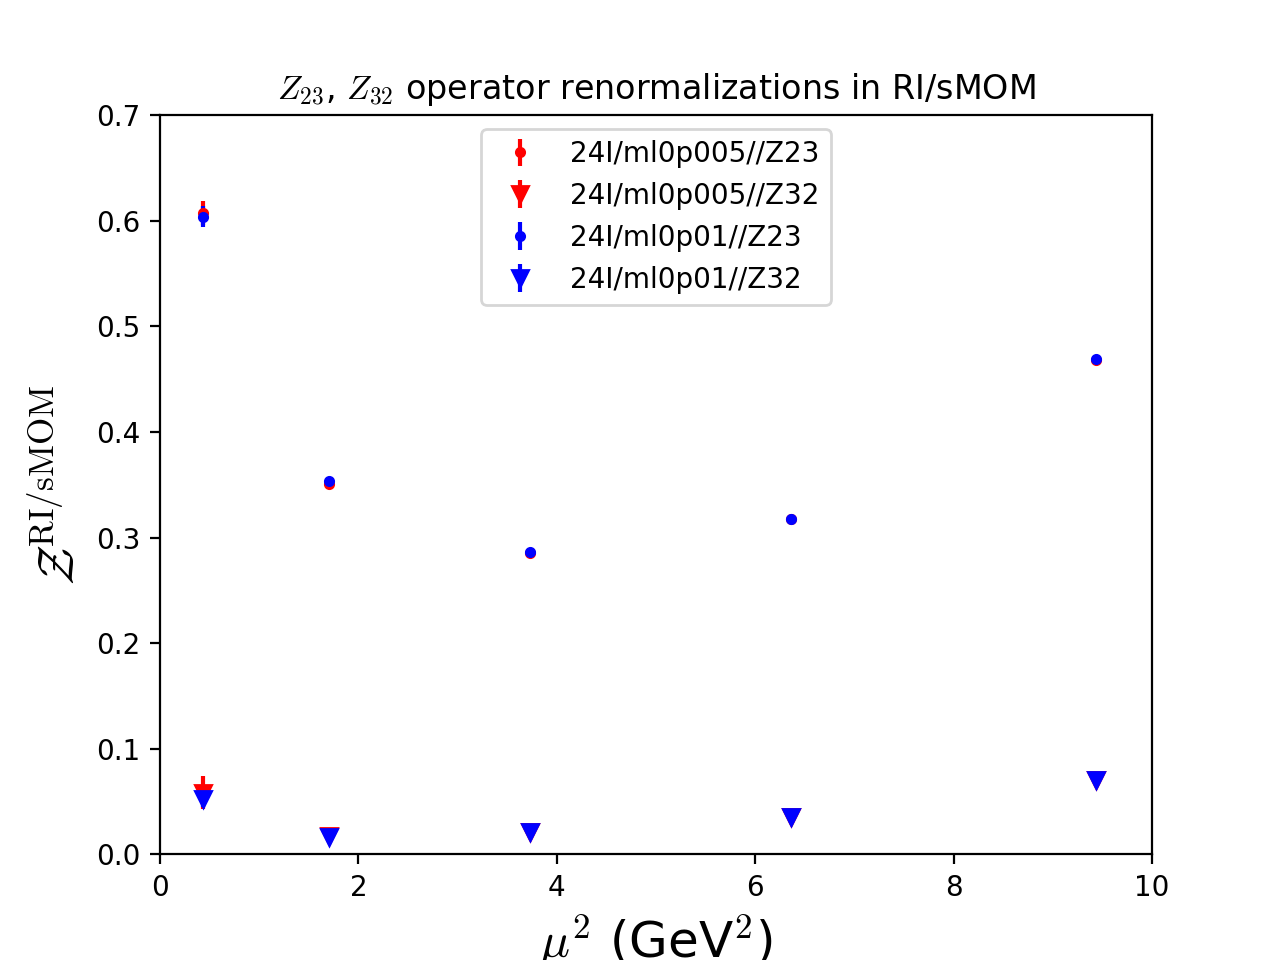

In [39]:
# Mixed Z23 and Z32 factors
Z23_mu_list = [np.mean(Z[1, 2], axis = 1) for Z in Z_list]
Z23_sigma_list = [np.std(Z[1, 2], axis = 1, ddof = 1) for Z in Z_list]
Z32_mu_list = [np.mean(Z[2, 1], axis = 1) for Z in Z_list]
Z32_sigma_list = [np.std(Z[2, 1], axis = 1, ddof = 1) for Z in Z_list]
plt.figure()
for idx in range(n_ens):
    plt.errorbar(mu_list[idx] ** 2, Z23_mu_list[idx], Z23_sigma_list[idx], fmt = '.', c = colors[idx], label = ensembles[idx] + '/Z23')
    plt.errorbar(mu_list[idx] ** 2, Z32_mu_list[idx], Z32_sigma_list[idx], fmt = 'v', c = colors[idx], label = ensembles[idx] + '/Z32')
plt.ylim((0, 0.7))
plt.xlim((0, 10))
plt.xlabel('$\mu^2$ (GeV$^2$)', fontsize = 18)
plt.ylabel('$\mathcal{Z}^\mathrm{RI/sMOM}$', fontsize = 18)
plt.title('$Z_{23}$, $Z_{32}$ operator renormalizations in RI/sMOM')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


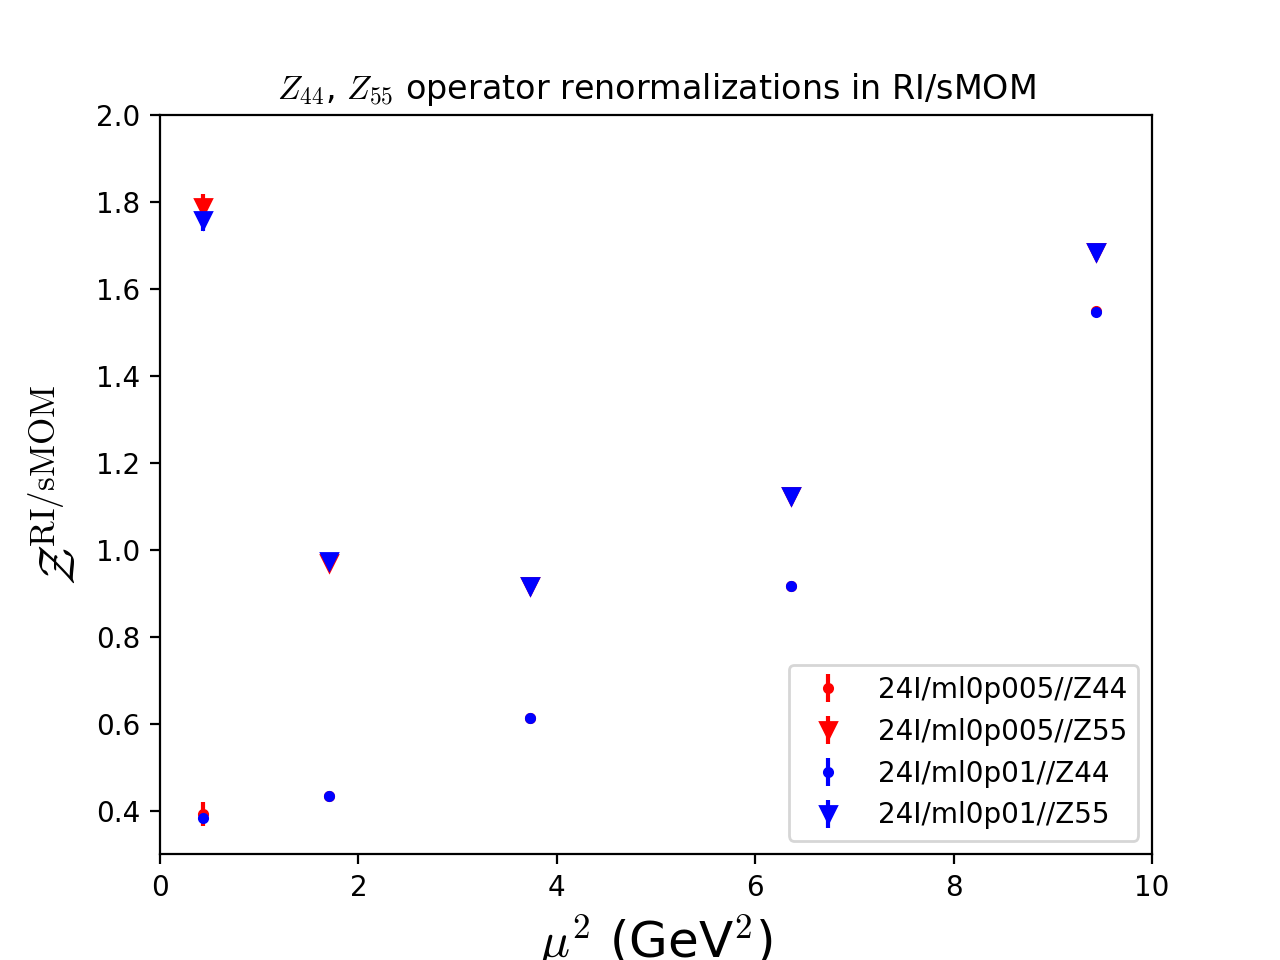

In [40]:
# Z44 and Z55 factors
Z44_mu_list = [np.mean(Z[3, 3], axis = 1) for Z in Z_list]
Z44_sigma_list = [np.std(Z[3, 3], axis = 1, ddof = 1) for Z in Z_list]
Z55_mu_list = [np.mean(Z[4, 4], axis = 1) for Z in Z_list]
Z55_sigma_list = [np.std(Z[4, 4], axis = 1, ddof = 1) for Z in Z_list]
plt.figure()
for idx in range(n_ens):
    plt.errorbar(mu_list[idx] ** 2, Z44_mu_list[idx], Z44_sigma_list[idx], fmt = '.', c = colors[idx], label = ensembles[idx] + '/Z44')
    plt.errorbar(mu_list[idx] ** 2, Z55_mu_list[idx], Z55_sigma_list[idx], fmt = 'v', c = colors[idx], label = ensembles[idx] + '/Z55')
plt.ylim((0.3, 2.0))
plt.xlim((0, 10))
plt.xlabel('$\mu^2$ (GeV$^2$)', fontsize = 18)
plt.ylabel('$\mathcal{Z}^\mathrm{RI/sMOM}$', fontsize = 18)
plt.title('$Z_{44}$, $Z_{55}$ operator renormalizations in RI/sMOM')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


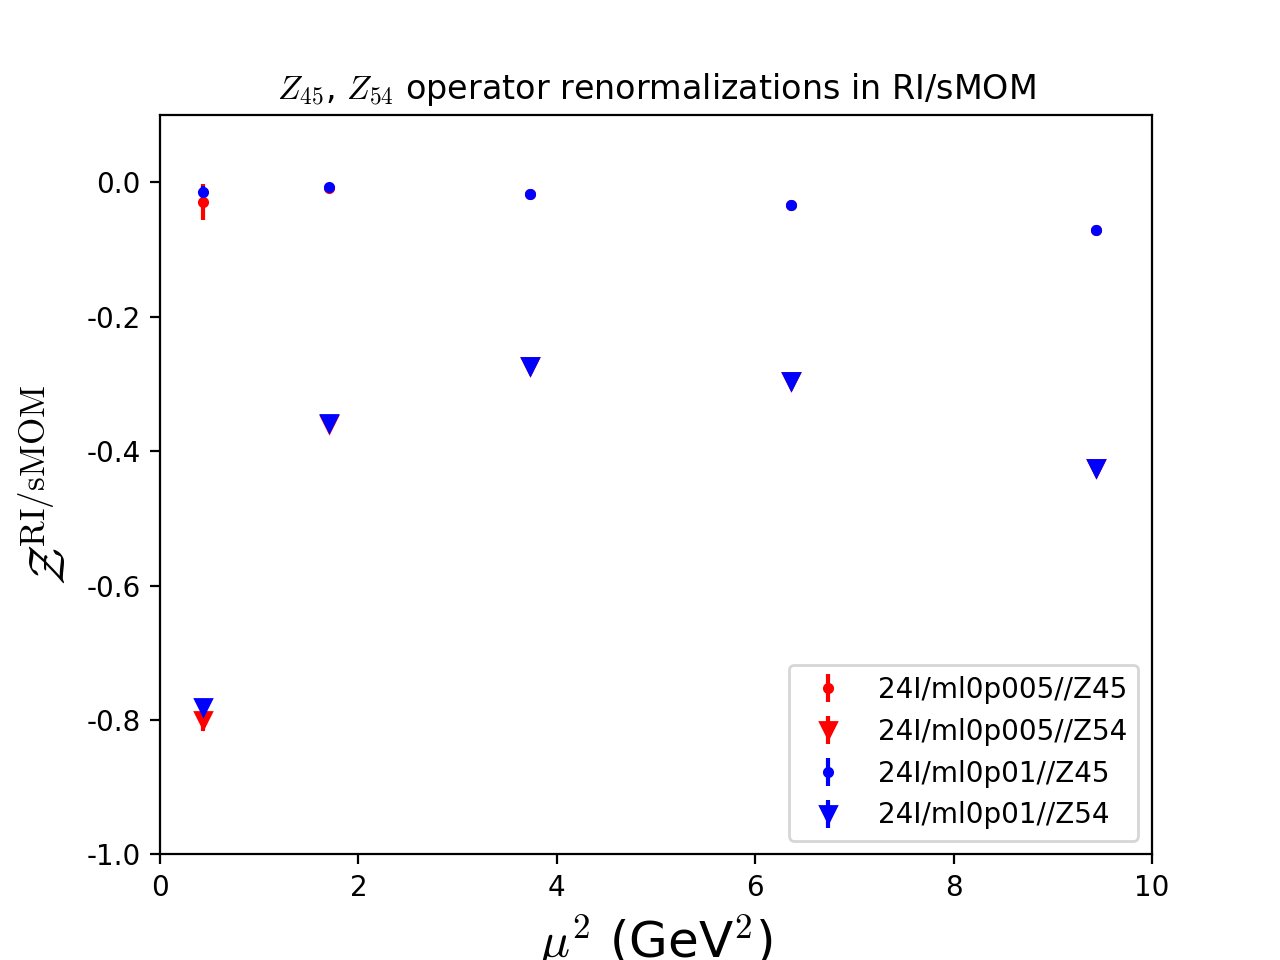

In [41]:
# Z45 and Z54 factors
Z45_mu_list = [np.mean(Z[3, 4], axis = 1) for Z in Z_list]
Z45_sigma_list = [np.std(Z[3, 4], axis = 1, ddof = 1) for Z in Z_list]
Z54_mu_list = [np.mean(Z[4, 3], axis = 1) for Z in Z_list]
Z54_sigma_list = [np.std(Z[4, 3], axis = 1, ddof = 1) for Z in Z_list]
plt.figure()
for idx in range(n_ens):
    plt.errorbar(mu_list[idx] ** 2, Z45_mu_list[idx], Z45_sigma_list[idx], fmt = '.', c = colors[idx], label = ensembles[idx] + '/Z45')
    plt.errorbar(mu_list[idx] ** 2, Z54_mu_list[idx], Z54_sigma_list[idx], fmt = 'v', c = colors[idx], label = ensembles[idx] + '/Z54')
plt.ylim((-1, 0.1))
plt.xlim((0, 10))
plt.xlabel('$\mu^2$ (GeV$^2$)', fontsize = 18)
plt.ylabel('$\mathcal{Z}^\mathrm{RI/sMOM}$', fontsize = 18)
plt.title('$Z_{45}$, $Z_{54}$ operator renormalizations in RI/sMOM')
plt.legend()
plt.show()

## Scale evolution of different RCs